<a href="https://colab.research.google.com/github/Mudra1123/Food-Waste-Prediction/blob/main/Food_Waste_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Step 1: Load the dataset
df=pd.read_csv("/content/Food Waste data and research - by country.csv")
df.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null    object
 11  Source

In [7]:
df.describe()

,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),M49 code
count,214.000000,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000
mean,126.794393,84.294393,2.658896e+06,15.116822,5.520454e+05,27.383178,1.138859e+06,433.971963
std,22.157879,18.313705,8.596906e+06,5.767840,2.195578e+06,6.508420,5.380459e+06,252.185786
min,61.000000,33.000000,8.500000e+02,3.000000,1.380000e+02,3.000000,2.760000e+02,4.000000
25%,115.000000,74.000000,6.831550e+04,13.000000,1.250925e+04,26.000000,2.239125e+04,219.000000
50%,123.000000,80.000000,5.205080e+05,16.000000,1.006500e+05,28.000000,1.884660e+05,432.000000
75%,137.750000,95.000000,2.111314e+06,16.000000,3.568158e+05,28.000000,6.307618e+05,645.250000
max,260.000000,189.000000,9.164621e+07,79.000000,2.242470e+07,90.000000,6.537774e+07,894.000000


In [8]:
df.isnull().sum()

,0
Country,0
combined figures (kg/capita/year),0
Household estimate (kg/capita/year),0
Household estimate (tonnes/year),0
Retail estimate (kg/capita/year),0
Retail estimate (tonnes/year),0
Food service estimate (kg/capita/year),0
Food service estimate (tonnes/year),0
Confidence in estimate,0
M49 code,0


In [9]:
df.drop(columns=["Source","Confidence in estimate"],inplace=True)

In [10]:
df.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),M49 code,Region
0,Afghanistan,126,82,3109153,16,594982,28,1051783,4,Southern Asia
1,Albania,127,83,238492,16,45058,28,79651,8,Southern Europe
2,Algeria,135,91,3918529,16,673360,28,1190335,12,Northern Africa
3,Andorra,123,84,6497,13,988,26,1971,20,Southern Europe
4,Angola,144,100,3169523,16,497755,28,879908,24,Sub-Saharan Africa


In [18]:
from sklearn.preprocessing import LabelEncoder
Label_encoder=LabelEncoder()

In [19]:
for i in ["Country","Region"]:
  df[i]=Label_encoder.fit_transform(df[i])

In [ ]:
df.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),M49 code,Region
0,0,126,82,3109153,16,594982,28,1051783,4,12
1,1,127,83,238492,16,45058,28,79651,8,13
2,2,135,91,3918529,16,673360,28,1190335,12,7
3,3,123,84,6497,13,988,26,1971,20,13
4,4,144,100,3169523,16,497755,28,879908,24,14


In [53]:
y=df["Household estimate (kg/capita/year)"]
x= df.drop(columns=["Household estimate (kg/capita/year)"])


In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [24]:
ypred=model.predict(xtest)

In [25]:
from sklearn.metrics import mean_absolute_error,r2_score
mae=mean_absolute_error(ytest,ypred)
r2=r2_score(ytest,ypred)

print("Mean Absolute Error:",mae)
print("R-squared Score:",r2)

Mean Absolute Error: 5.546361096496058e-10
R-squared Score: 1.0


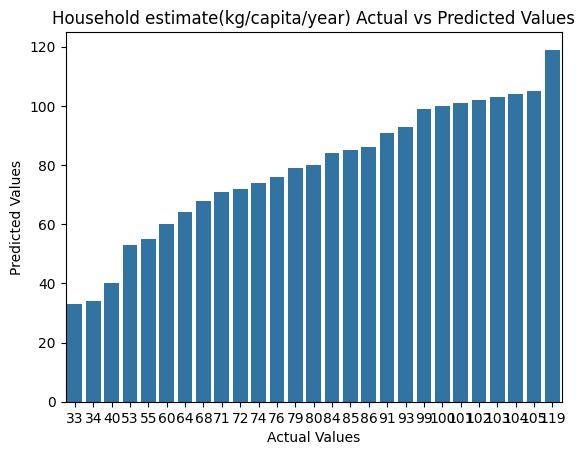

In [52]:
sns.barplot(x=ytest,y=ypred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Household estimate(kg/capita/year) Actual vs Predicted Values")
plt.show()